<a href="https://colab.research.google.com/github/luanans/Heart_Failure/blob/main/heart_failure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto - Módulo 2
Integrantes: Luana Nunes, Daiane Ribeiro de Souza, Sarah David Müzel e Paulo Muraro Ferreira

# Descrição  dos Dados

Esse trabalho é sobre o dataset: Heart Failure Prediction, disponivel no **kaggle** <a href="https://www.kaggle.com/andrewmvd/heart-failure-clinical-data?select=heart_failure_clinical_records_dataset.csv"> </a>.

As doenças cardiovasculares (DCVs) são a causa número 1 de morte em todo o mundo, levando cerca de 17,9 milhões de vidas a cada ano, o que representa 31% de todas as mortes em todo o mundo.
A insuficiência cardíaca é um evento comum causado por DCVs e este conjunto de dados contém 12 paraparâmetros sobre 299 pacientes que sofreram parada cardíaca. 

Todos os pacientes apresentavam histórico de disfunção sistólica ventricular esquerda. Sendo classificados nos grupos de risco 3 ou 4 de acordo com a classificação de estágio de falência cardíaca da New York Heart Association (NYHA). Os dados foram coletados durante o período de acompanhamento dos pacientes.

A maioria das doenças cardiovasculares pode ser prevenida abordando os fatores de risco comportamentais, como uso de tabaco, dieta não saudável e obesidade, sedentarismo e uso nocivo de álcool, usando estratégias para toda a população.

Pessoas com doenças cardiovasculares ou que apresentam alto risco cardiovascular (devido à presença de um ou mais fatores de risco, como hipertensão, diabetes, hiperlipidemia ou doença já estabelecida) precisam de detecção e gerenciamento precoces, em que um modelo de aprendizado de máquina pode ser de grande ajuda.

<br>

**Artigo original: Davide Chicco, Giuseppe Jurman: "Machine learning can predict survival of patients with heart failure from serum creatinine and ejection fraction alone". BMC Medical Informatics and Decision Making 20, 16 (2020).**


# Conhecendo os Dados

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.figure_factory as ff
import plotly.express as px
import plotly.graph_objects as go

import warnings
warnings.filterwarnings("ignore")

In [ ]:
heart = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00519/heart_failure_clinical_records_dataset.csv")
heart

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [ ]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


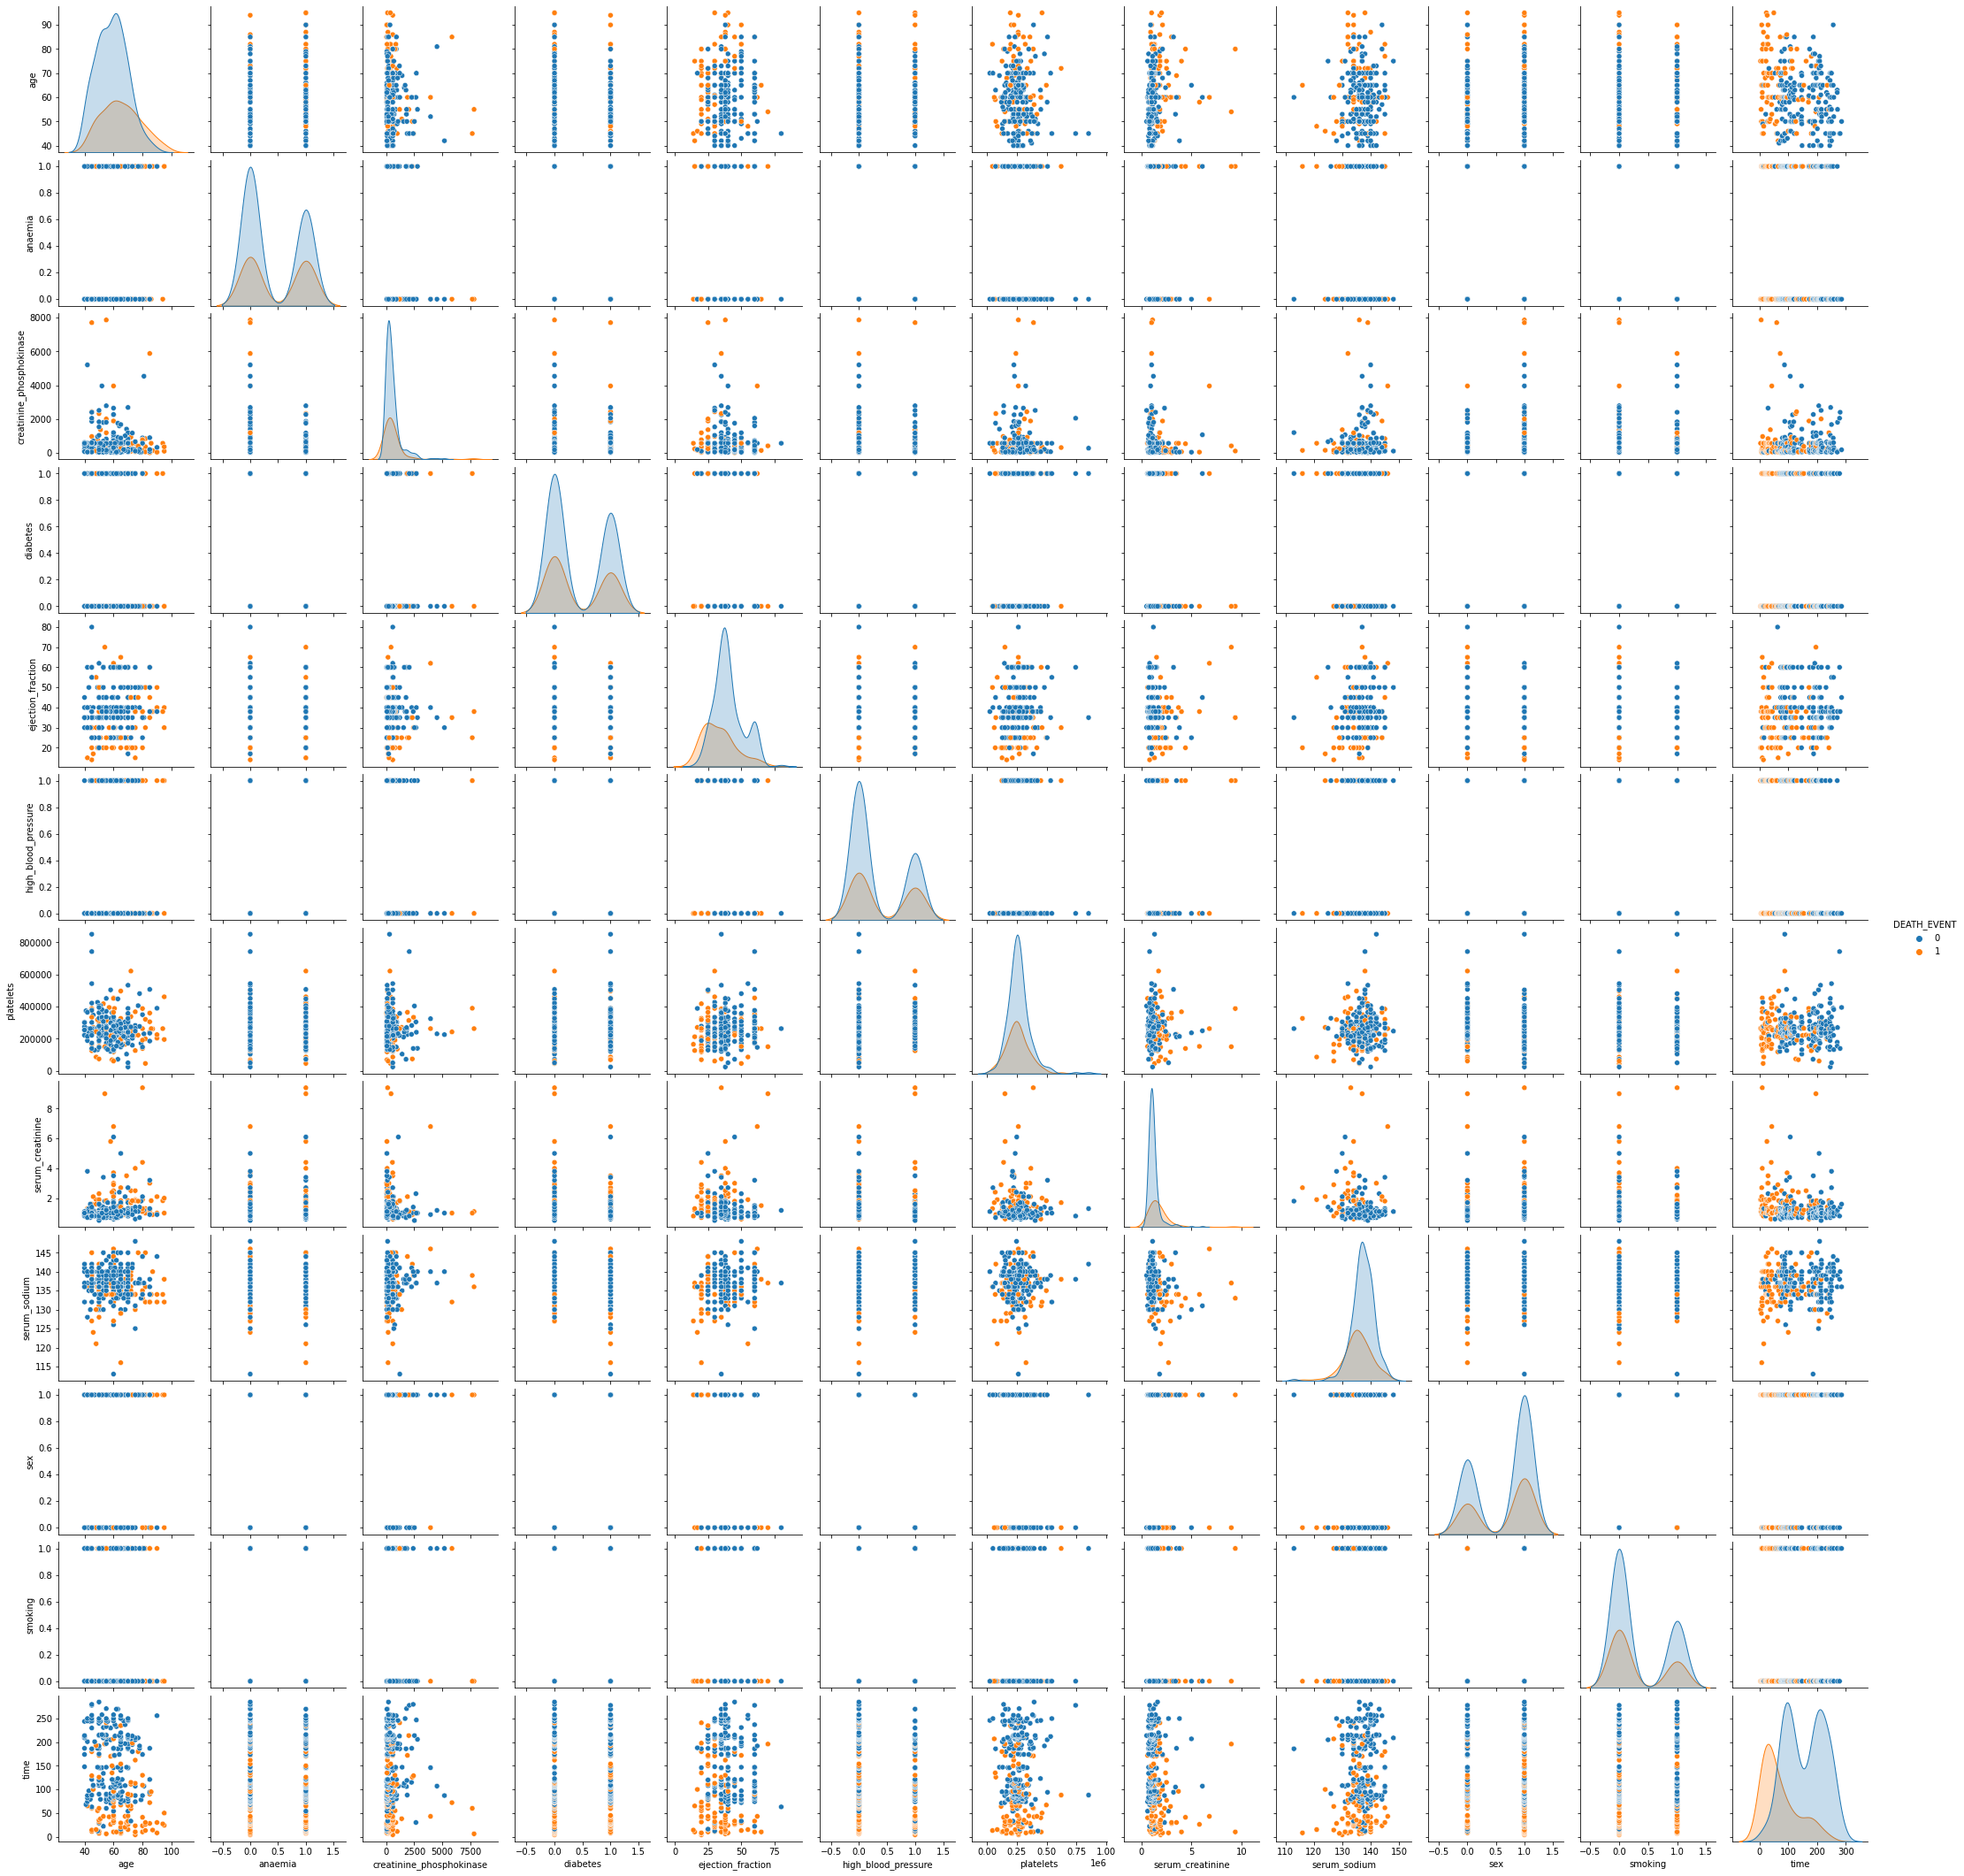

In [ ]:
sns.pairplot(heart, hue='DEATH_EVENT');

Através de uma verificação dos dados, observa-se que:
- Não há presença de dados nulos
- Que ao todo, tem-se os dados de 299 pacientes que sofreram um infarto
- Foram analisados 12 fatores principais (variáveis de entrada).
- A variável resposta estudada é a morte dos pacientes que sofreram um infarto.

Os fatores análisados são:

- age: Idade dos pacientes 
- anaemia: Se os pacientes tem anemia
- creatinine_phosphokinase: Nível da enzima CPK no sangue (mcg/L)
- diabetes: Se o paciente tem diabetes
- ejection_fraction: Porcentagem de sangue saindo do coração a cada contração (porcentagem)  
- high_blood_pressure: Se o paciente tem pressão alta
- platelets: Plaquetas no sangue (quilo de plaquetas/mL)   
- serum_creatinine: Nível de creatinina sérica no sangue (mg/dL)
- serum_sodium: Nível de sódio sérico no sangue (mEq/L)       
- sex: Sexo dos pacientes   
- smoking: Se o paciente é fumante       
- time: Período de acompanhamento (dias)

A variável resposta análisada é:

- DEATH_EVENT: Se o paciente faleceu durante o período de acompanhamento



## Estatistica descritiva

In [ ]:
heart.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


Por meio da estatística descritiva, observa-se que os pacientes estudados tinham:
- Idade minima = 40 anos
- Idade Média = 60 anos 
- Idade máxima = 95 anos

Sendo que 75% do dataset consiste em pacientes com menos de 70 anos.

In [ ]:
# Análisando a quantidade de mortes 
heart[['DEATH_EVENT']].sum()

DEATH_EVENT    96
dtype: int64

Analisando o dataset, verifica-se que dentre os 299 pacientes que sofreram infarto, 96 pacientes foram a óbito, o que representa aproximadamente 32% do total de pacientes.

# Análisando os óbitos ocorridos

Nesse estudo foram levantos 12 fatores  para compreender a relação dos infartos como hábitos (fumar), condições clinicas (pressão sanguínea, anemia, etc) e sexo, idade, dentre outros.

## Idade



In [ ]:
# convertendo o tipo de dado da coluna age para inteiro
heart = heart.astype({"age": int})

Analisando a idades dos pacientes infartados

In [ ]:
heart[['age']].value_counts()

age
60     35
50     27
65     26
70     25
45     19
55     17
75     11
53     10
58     10
63      8
72      7
40      7
42      7
80      7
85      6
68      5
52      5
62      5
73      4
61      4
59      4
49      4
51      4
69      3
64      3
90      3
46      3
82      3
67      2
66      2
44      2
48      2
95      2
54      2
57      2
78      2
77      2
79      1
86      1
56      1
47      1
87      1
43      1
94      1
41      1
81      1
dtype: int64

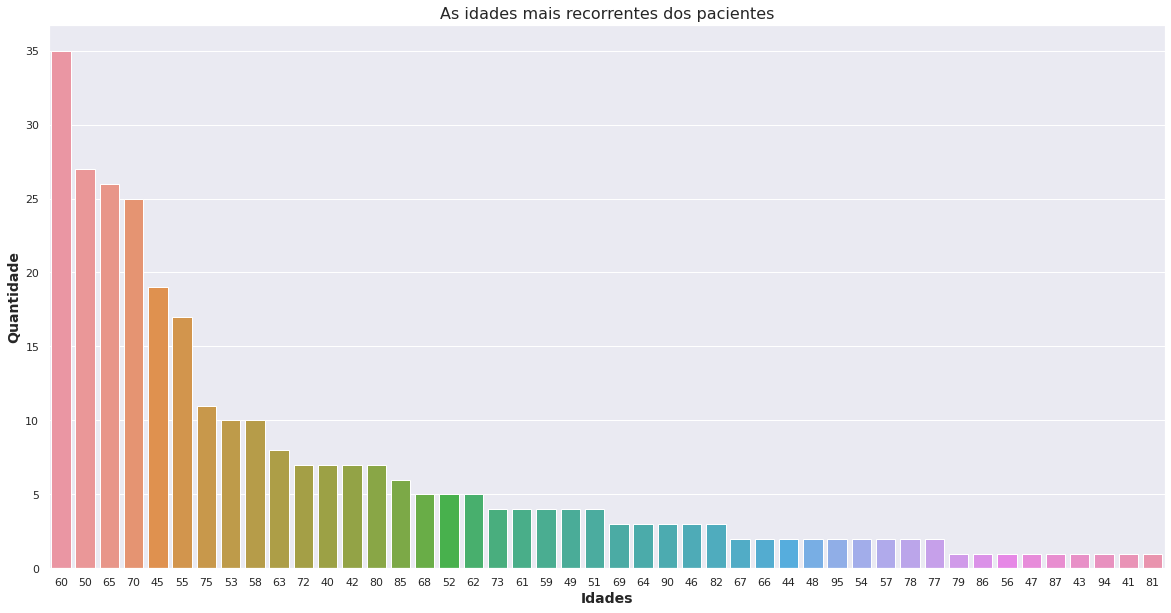

In [ ]:
# crinado um gráfico para facilitar a vizualização das idades mais recorrentes

sns.set() # para trazer as configurações padrão do gráfico do seaborn que o colab não está importando
plt.figure(figsize= (20, 10)) # função do matplotlib que muda o tamanho da imagem
fig= sns.countplot(data=heart, x=heart['age'], order=heart['age'].value_counts().index) # criar gráfico

fig.set_title('As idades mais recorrentes dos pacientes', fontsize = 16)# nome do título

fig.set_ylabel('Quantidade', fontsize=14, fontweight = 'bold')
fig.set_xlabel('Idades', fontsize=14, fontweight = 'bold')

plt.show()

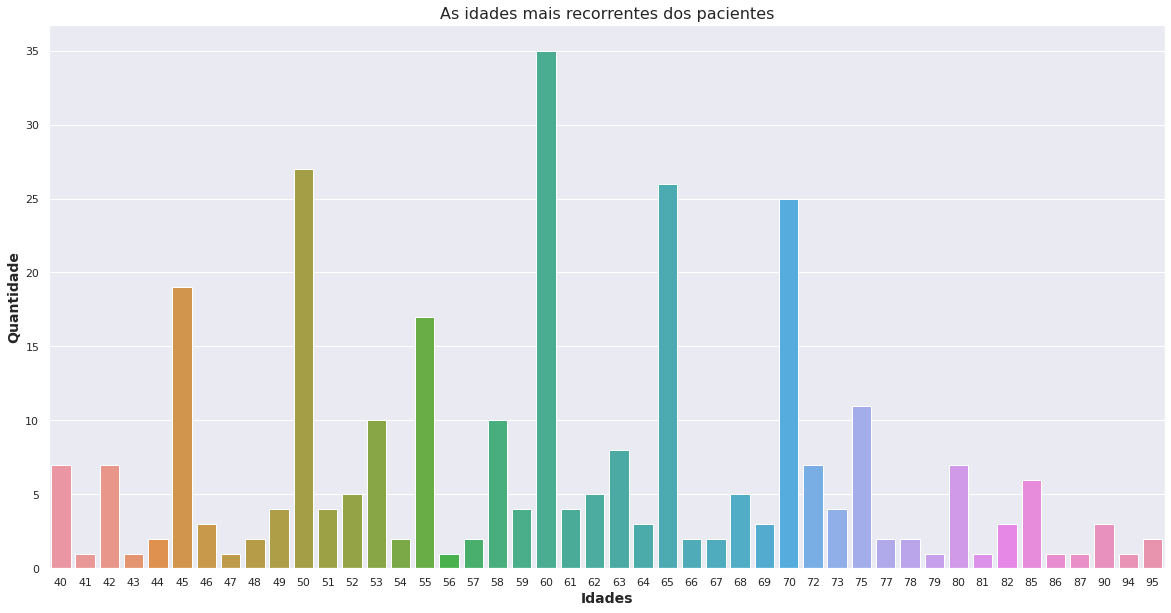

In [ ]:
## segundo opção

sns.set() # para trazer as configurações padrão do gráfico do seaborn que o colab não está importando
plt.figure(figsize= (20, 10)) # função do matplotlib que muda o tamanho da imagem
fig= sns.countplot(data=heart, x=heart['age']) # criar gráfico

fig.set_title('As idades mais recorrentes dos pacientes', fontsize = 16)# nome do título

fig.set_ylabel('Quantidade', fontsize=14, fontweight = 'bold')
fig.set_xlabel('Idades', fontsize=14, fontweight = 'bold')

plt.show()

In [ ]:
#fig_histograma = px.histogram(heart, x="age", nbins=200)
#fig_histograma.show() # para não mostrar as informações acima do gráfico

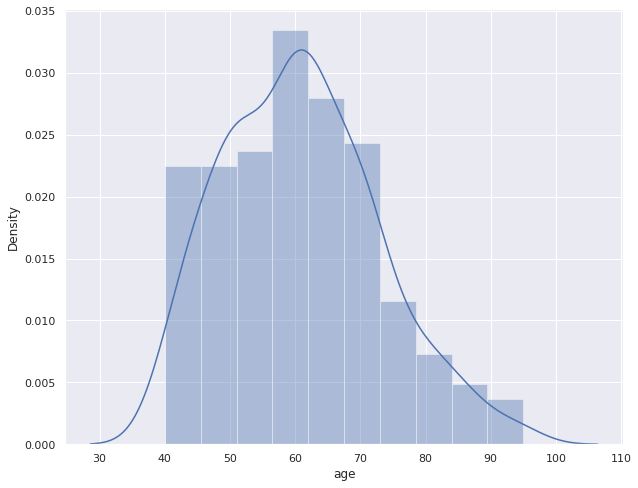

In [ ]:
#plt.figure (figsize= (10, 8))
#sns.distplot(heart['age']);

Para compreender melhor a distribuição das faixas etárias dentro do grupo de pacientes análisado, os dados foram dividios em 5 grupos de idade.

In [ ]:
heart['grupos_idades'] = pd.qcut(heart.age, 5)
heart.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,grupos_idades
0,75,0,582,0,20,1,265000.00,1.9,130,1,0,4,1,"(70.0, 95.0]"
1,55,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1,"(50.0, 58.0]"
2,65,0,146,0,20,0,162000.00,1.3,129,1,1,7,1,"(63.0, 70.0]"
3,50,1,111,0,20,0,210000.00,1.9,137,1,0,7,1,"(39.999, 50.0]"
4,65,1,160,1,20,0,327000.00,2.7,116,0,0,8,1,"(63.0, 70.0]"


In [ ]:
# verifiando os grupos criados e a quantidade de pacientes dentro de cada grupo
heart['grupos_idades'].value_counts()

(39.999, 50.0]    74
(63.0, 70.0]      66
(58.0, 63.0]      56
(70.0, 95.0]      52
(50.0, 58.0]      51
Name: grupos_idades, dtype: int64

In [ ]:
# análisando a porcentagem de mortes dentro de cada grupo etário
morte_por_idade = heart.groupby(['grupos_idades'])[['DEATH_EVENT']].apply(lambda x: x.sum()/heart[['DEATH_EVENT']].sum())
(morte_por_idade*100).style.format('{0:,.1f}%')

,DEATH_EVENT
grupos_idades,
"(39.999, 50.0]",19.8%
"(50.0, 58.0]",9.4%
"(58.0, 63.0]",18.8%
"(63.0, 70.0]",19.8%
"(70.0, 95.0]",32.3%


É possivel observar, a maioria dos óbitos ocorreu no grupo entre 70 e 95 anos de idade.

## Fumantes

In [ ]:
qtd_fumantes = heart['smoking'].sum() # determinar a quantidade de fumantes
qtd_nao_fumantes = (heart['smoking'] == 0).sum() # determinar a quantidade de não fumantes

fumantes_mortos = len(heart[(heart['smoking']==1) & (heart['DEATH_EVENT']==1)]) #  determinar a quantidade de fumantes que morrem
fumantes_nao_mortos = len(heart[(heart['smoking']==1) & (heart['DEATH_EVENT']==0)]) # determinar a quantidade de fumantes que não morrem

print(f'Quantidade de Fumantes: {qtd_fumantes} \nQuantidade de não-fumantes: {qtd_nao_fumantes}')
print(f'Quantidade de fumantes que faleceram: {fumantes_mortos} \nQuantidade fumantes que não faleceram: {fumantes_nao_mortos} ')


Quantidade de Fumantes: 96 
Quantidade de não-fumantes: 203
Quantidade de fumantes que faleceram: 30 
Quantidade fumantes que não faleceram: 66 


In [ ]:
heart['smoking'].value_counts()

0    203
1     96
Name: smoking, dtype: int64

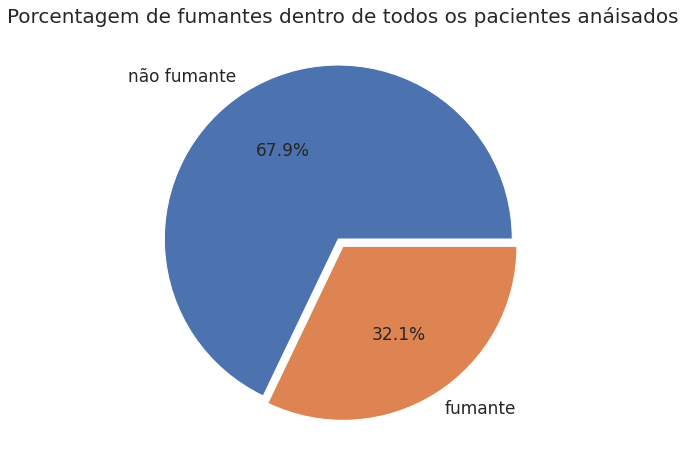

In [ ]:
# Criando um gráfico de pizza para ver a distribuição dos dados

fig1 = heart['smoking'].value_counts()
plt.figure (figsize= (10, 8)) # função do matplotlib que muda o tamanho da imagem
labels = ['não fumante', 'fumante'] # colocar o nome em cada fatia
plt.axis ('equal') # para o gráfico sair circular e não oval
plt.title ('Porcentagem de fumantes dentro de todos os pacientes anáisados', fontsize=20)  # titulo do gráfico
explode = [0.05, 0] # deixar uma parte em evidencia

# autopct -> mostra os valores em %
plt.pie(fig1, labels=labels, explode = explode, textprops={'fontsize': 17},autopct='%1.1f%%')
plt.show()

In [ ]:
# probabilidade um fumante falecer 
fumante_morre = fumantes_mortos/qtd_fumantes*100
fumante_morre

31.25

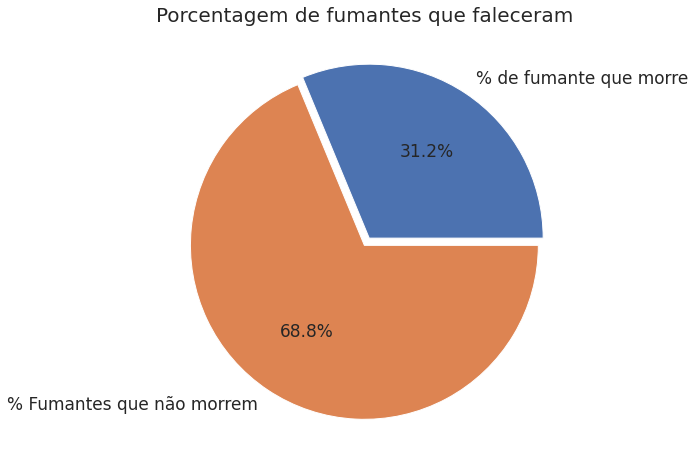

In [ ]:
fig1 = [fumantes_mortos, fumantes_nao_mortos]
plt.figure (figsize= (10, 8)) # função do matplotlib que muda o tamanho da imagem
labels = ['% de fumante que morre', '% Fumantes que não morrem'] # colocar o nome em cada fatia
plt.axis ('equal') # para o gráfico sair circular e não oval
plt.title ('Porcentagem de fumantes que faleceram', fontsize=20)  # titulo do gráfico
explode = [0.05, 0] # deixar uma parte em evidencia

# autopct -> mostra os valores em %
plt.pie(fig1, labels=labels, explode = explode, textprops={'fontsize': 17},autopct='%1.1f%%')
plt.show()

In [ ]:
qtd_fumantes = heart['smoking'].sum()
qtd_nao_fumantes = (heart['smoking'] == 0).sum()

fumam = heart.groupby(['smoking'])[['DEATH_EVENT']].transform(lambda x: x.sum()/qtd_nao_fumantes if heart['smoking'].iloc[x.index[0]]==0 else x.sum()/qtd_fumantes)
fumam['smoking'] = heart['smoking']
fumantes = fumam.groupby(['smoking']).apply(lambda x: x.mean()).drop(['smoking'], axis =1)
fum1 = (fumantes*100).style.format('{0:,.1f}%').set_caption("Probabilidade de falecer se fuma (smoking=0) e se não fuma (smoking=1)")
fum1

,DEATH_EVENT
smoking,
0,32.5%
1,31.2%


In [ ]:
# Gráfico de pizza, da distribuição dos alunos por currículo em % e para retira currículos que não existem

s_full_curriculum = df_last_classes["full_student_curriculum"].value_counts()

curriculums = ["BEG-v1", "INT-v1", "ADV-v1", "ADV-v2", "PRO-v1", "PRO-v2"]
lst_full_curriculum = list()

for curriculum in curriculums:
    lst_full_curriculum.append(s_full_curriculum[curriculum])

s_full_curriculum = pd.Series(data=lst_full_curriculum, index=curriculums)

fig = go.Figure(
    data=[
        go.Pie(
            labels=s_full_curriculum.index,
            values=s_full_curriculum.values,
            hoverinfo="label+value",
            textinfo="percent",
            sort=False,
        )
    ]
)

fig.update_layout(
    title={"text": "Students per Curriculum"},  
    legend={"title": "Curriculum"}, 
    height=600,
    width = 600
)

fig.show()

In [ ]:
dados = ["qtd_fumantes", "qtd_nao_fumantes ", "fumantes_mortos", "fumantes_nao_mortos"]

In [ ]:

fig = px.pie(heart, values='smoking', )
fig.show()


<Figure size 360x360 with 0 Axes>

## Pressão alta



In [ ]:
heart[['high_blood_pressure']].sum()

high_blood_pressure    105
dtype: int64

In [ ]:
heart[['high_blood_pressure']].sum()/len(heart)

high_blood_pressure    0.351171
dtype: float64

Hipertensos que morreram.

In [ ]:
table2 = heart.groupby(['high_blood_pressure'])[['DEATH_EVENT']].apply(lambda x: x.sum()/105)
(table2*100).style.format('{0:,.1f}%')

,DEATH_EVENT
high_blood_pressure,
0,54.3%
1,37.1%


Falecidos que tinham pressão alta.

In [ ]:
table2 = heart.groupby(['DEATH_EVENT'])[['high_blood_pressure']].apply(lambda x: x.sum()/105)
(table2*100).style.format('{0:,.1f}%')

,high_blood_pressure
DEATH_EVENT,
0,62.9%
1,37.1%


In [ ]:
qtd_pressao = heart['high_blood_pressure'].sum()
qtd_nao_pressao = (heart['high_blood_pressure'] == 0).sum()
pressao_mortos = len(heart[(heart['high_blood_pressure']==1) & (heart['DEATH_EVENT']==1)])
nao_pressao_mortos = len(heart[(heart['high_blood_pressure']==0) & (heart['DEATH_EVENT']==1)])

In [ ]:
probabilidade_morrer_se_nao_pressao = 100*nao_pressao_mortos/qtd_nao_pressao
probabilidade_morrer_se_nao_pressao

29.38144329896907

In [ ]:
probabilidade_morrer_se_pressao = 100*pressao_mortos/qtd_pressao
probabilidade_morrer_se_pressao

37.142857142857146

In [ ]:
qtd_hipertensos = heart['high_blood_pressure'].sum()
qtd_nao_hipertensos = (heart['high_blood_pressure'] == 0).sum()

pressao = heart.groupby(['high_blood_pressure'])[['DEATH_EVENT']].transform(lambda x: x.sum()/qtd_nao_hipertensos if heart['high_blood_pressure'].iloc[x.index[0]]==0 else x.sum()/qtd_hipertensos)
pressao['high_blood_pressure'] = heart['high_blood_pressure']
pressao1 = pressao.groupby(['high_blood_pressure']).apply(lambda x: x.mean()).drop(['high_blood_pressure'], axis =1)
press = (pressao1*100).style.format('{0:,.1f}%').set_caption("Probabilidade de falecer se é hipertenso(=1) e se não é hipertenso (=0)")
press

,DEATH_EVENT
high_blood_pressure,
0,29.4%
1,37.1%


## Diabetes

Porcentagem dos falecidos que era diabéticos.

In [ ]:
table2 = heart.groupby(['diabetes'])[['DEATH_EVENT']].apply(lambda x: x.sum()/heart[['DEATH_EVENT']].sum())
(table2*100).style.format('{0:,.1f}%')

,DEATH_EVENT
diabetes,
0,58.3%
1,41.7%


Porcentagem dos diabéticos que morreram.

In [ ]:
table2 = heart.groupby(['DEATH_EVENT'])[['diabetes']].apply(lambda x: x.sum()/heart[['diabetes']].sum())
(table2*100).style.format('{0:,.1f}%')

,diabetes
DEATH_EVENT,
0,68.0%
1,32.0%


In [ ]:
qtd_diabeticos = heart['diabetes'].sum()
qtd_nao_diabeticos = (heart['diabetes'] == 0).sum()
diabeticos_mortos = len(heart[(heart['diabetes']==1) & (heart['DEATH_EVENT']==1)])
nao_diabeticos_mortos = len(heart[(heart['diabetes']==0) & (heart['DEATH_EVENT']==1)])

In [ ]:
probabilidade_morrer_se_diabetico = 100*diabeticos_mortos/qtd_diabeticos
probabilidade_morrer_se_diabetico

32.0

In [ ]:
probabilidade_morrer_se_nao_diabetico = 100*nao_diabeticos_mortos/qtd_nao_diabeticos
probabilidade_morrer_se_nao_diabetico

32.18390804597701

In [ ]:
qtd_diabeticos = heart['diabetes'].sum()
qtd_nao_diabeticos = (heart['diabetes'] == 0).sum()

diabetes = heart.groupby(['diabetes'])[['DEATH_EVENT']].transform(lambda x: x.sum()/qtd_nao_diabeticos if heart['diabetes'].iloc[x.index[0]]==0 else x.sum()/qtd_diabeticos)
diabetes['diabetes'] = heart['diabetes']
diabetes1= diabetes.groupby(['diabetes']).apply(lambda x: x.mean()).drop(['diabetes'], axis =1)
(diabetes1*100).style.format('{0:,.1f}%').set_caption("Probabilidade de falecer se é diabético (=1) e se não é diabético (=0)")

,DEATH_EVENT
diabetes,
0,32.2%
1,32.0%


## Sexo

In [ ]:
table2 = heart.groupby(['sex'])[['DEATH_EVENT']].apply(lambda x: x.sum()/heart[['DEATH_EVENT']].sum())
(table2*100).style.format('{0:,.1f}%')

,DEATH_EVENT
sex,
0,35.4%
1,64.6%


In [ ]:
qtd_male = heart['sex'].sum()
qtd_female = (heart['sex'] == 0).sum()

sexo = heart.groupby(['sex'])[['DEATH_EVENT']].transform(lambda x: x.sum()/qtd_female if heart['sex'].iloc[x.index[0]]==0 else x.sum()/qtd_male)
sexo['sex'] = heart['sex']
sexo1= sexo.groupby(['sex']).apply(lambda x: x.mean()).drop(['sex'], axis =1)
(sexo1*100).style.format('{0:,.1f}%').set_caption("Probabilidade de falecer se male (=1) e se é female (=0)")

,DEATH_EVENT
sex,
0,32.4%
1,32.0%


**Em resumo**

Probabilidade de falececer se fuma = 32,5%

Probabilidade de falecer se não fuma = 32,5%

Probabilidade de falecer se é hipertenso = 37,1%

Probabilidade de falecer se não é hipertenso = 29,4%

Probabilidade de falecer se tem diabetes = 32%

Probabilidade de falecer se não tem diabetes = 32,2%

Probabilidade de falecer se male = 32%

Probabilidade de falecer se female = 32.4%


In [ ]:
data = {}
pd.DataFrame.from_dict(data)
data['Fumantes'] = fumantes['DEATH_EVENT']
data['Pressão Alta'] = pressao1['DEATH_EVENT']
data['Diabetes'] = diabetes1['DEATH_EVENT']
data['Sexo'] = sexo1['DEATH_EVENT']
(pd.DataFrame(data)*100).style.format('{0:,.1f}%').set_caption("Probabilidade de falecer")


,Fumantes,Pressão Alta,Diabetes,Sexo
0,32.5%,29.4%,32.2%,32.4%
1,31.2%,37.1%,32.0%,32.0%


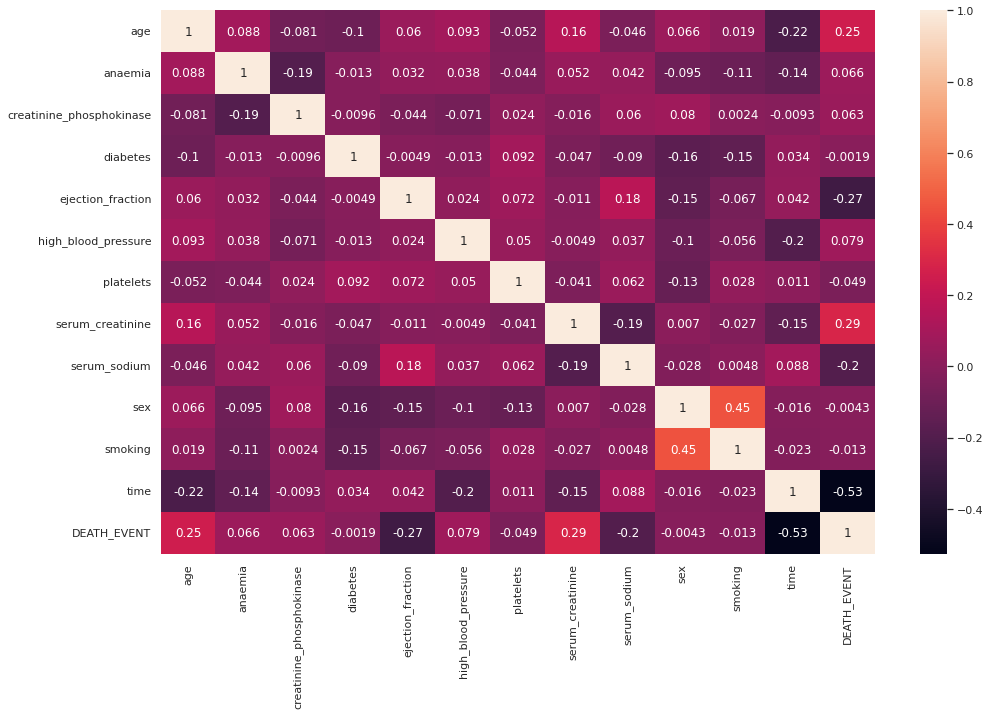

In [ ]:
# para facilitar a visualização dessa correlação podemos criar um gráfico usando o método heatmap seaborn
# no quai vai aparacer o valor de cada um das correlações dentro dos quadrados.

# 1- gerando a correlação
correlação = heart.corr()

#2- Gerando mapa heatmap
plt.figure(figsize=(16,10))
sns.heatmap(data=correlação, annot=True)

# análisando as acusa conjuntas 

multiplos fatores

In [ ]:
table2 = heart.groupby(['high_blood_pressure',"grupos_idades"])[['DEATH_EVENT']].apply(lambda x: x.sum()/len(heart))
(table2*100).style.format('{0:,.1f}%')

In [ ]:
table2 = heart.groupby(['high_blood_pressure',"grupos_idades"])[['DEATH_EVENT']].apply(lambda x: x.sum()/len(heart))
(table2*100).style.format('{0:,.1f}%')

In [ ]:
table2 = heart.groupby(['high_blood_pressure',"grupos_idades"])[['DEATH_EVENT']].apply(lambda x: x.sum()/len(heart['DEATH_EVENT']))
(table2*100).style.format('{0:,.1f}%')

In [ ]:
table2 = heart.groupby(['high_blood_pressure', 'smoking',"grupos_idades", ])[['DEATH_EVENT']].apply(lambda x: x.sum()/len(heart))
(table2*100).style.format('{0:,.1f}%')

In [ ]:
table2 = heart.groupby(['serum_sodium','high_blood_pressure',"grupos_idades", ])[['DEATH_EVENT']].apply(lambda x: x.sum()/len(heart))
(table2*100).style.format('{0:,.1f}%')

Os valores de referência da CPK são entre 30.00 U/L e 200.00 U/L para homens e entre 29.00 U/L e 168.00 U/L para mulheres. Resultados fora dessa faixa devem ser acompanhados por um médico. Valores baixos podem ocorrer em pessoas com baixa massa muscular, desnutridas e idosos.
CPK é a sigla para a creatinofosfoquinase, uma enzima do corpo humano que está presente nos músculos e em outros lugares do corpo, como o cérebro, o pulmão ou o coração. Quando elevada, essa enzima pode ser um marcador de infarto do miocárdio, miocardite, hipertermia e distrofia muscular.

In [ ]:
# probabilidade de um fumante não falecer
nao_fumantes_mortos = len(heart[(heart['smoking']==0) & (heart['DEATH_EVENT']==1)]) # determinar a quantidade de não fumantes que morrem
print(f'Quantidade de não fumantes mortos: {nao_fumantes_mortos}')

fumante_nao_morre =nao_fumantes_mortos/qtd_nao_fumantes*100
fumante_nao_morre

In [ ]:
def prob(y):
  z = y + ['DEATH_EVENT']
  return heart.groupby(z).apply(lambda x: len(x)).reset_index().iloc[-1:,-1].values[0]/heart.groupby(y).apply(lambda x: len(x)).reset_index().iloc[-1:,-1].values[0]

prob(['diabetes'])